In [2]:
%pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]

Note: you may need to restart the kernel to use updated packages.


✅ 모델이 'kbo_xgb_model.pkl'로 저장되었습니다.

🧪 [XGBoost 모델 평가]
MAE : 1.09
MSE : 2.25
R²  : 0.8875


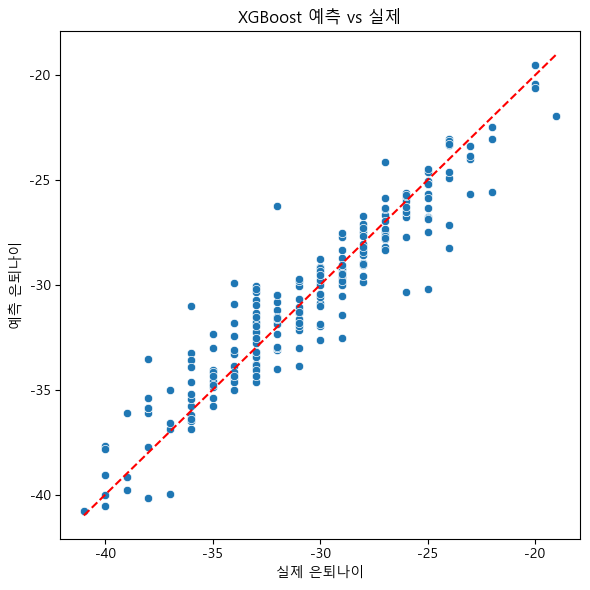


🔍 오차 큰 TOP 10
     실제 은퇴나이    예측 은퇴나이     오차(년)
189      -32 -26.247908 -5.752092
106      -25 -30.208817  5.208817
33       -36 -31.015392 -4.984608
190      -38 -33.536259 -4.463741
213      -26 -30.319378  4.319378
76       -24 -28.253250  4.253250
183      -34 -29.895361 -4.104639
2        -22 -25.587194  3.587194
18       -29 -32.517555  3.517555
123      -24 -27.144104  3.144104


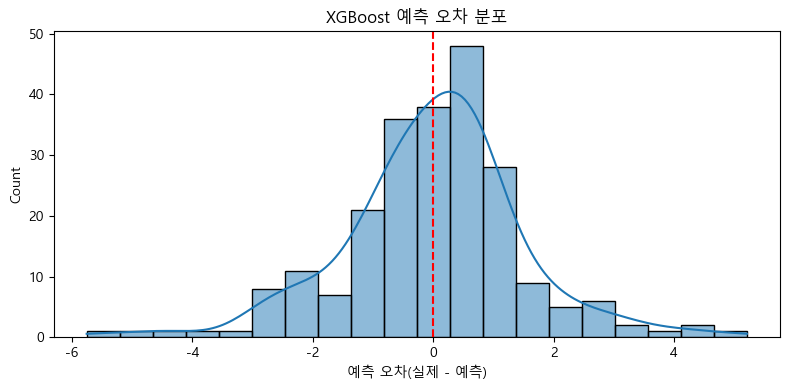

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import pickle
from xgboost import XGBRegressor

# 1. 데이터 불러오기
df = pd.read_csv(r"C:\Users\In\Desktop\프로젝트\SKN13-2nd-2Team\data\mingyu\kbo_retired_total.csv")

# 1-1. 은퇴 나이 계산
df['은퇴_나이'] = df['birth_year'] - df['retire_year']

# 2. X, y 분리
target_col = '은퇴_나이'
X = df.drop(columns=[target_col, '선수명'], errors='ignore')
y = df[target_col]

# 3. 더미 인코딩
X = pd.get_dummies(X)

# 4. 훈련/검증 세트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. XGBoost 모델 학습
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ✅ 6. 피클로 저장
with open('kbo_xgb_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ 모델이 'kbo_xgb_model.pkl'로 저장되었습니다.")

# 7. 성능 평가
print("\n🧪 [XGBoost 모델 평가]")
print("MAE :", round(mean_absolute_error(y_test, y_pred), 2))
print("MSE :", round(mean_squared_error(y_test, y_pred), 2))
print("R²  :", round(r2_score(y_test, y_pred), 4))

# 8. 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 예측 vs 실제 산점도
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('실제 은퇴나이')
plt.ylabel('예측 은퇴나이')
plt.title('XGBoost 예측 vs 실제')
plt.tight_layout()
plt.show()

# 오차 상위 출력
result_df = pd.DataFrame({
    '실제 은퇴나이': y_test.values,
    '예측 은퇴나이': y_pred,
    '오차(년)': y_test.values - y_pred
})
print("\n🔍 오차 큰 TOP 10")
print(result_df.sort_values(by='오차(년)', key=abs, ascending=False).head(10))

# 오차 분포
plt.figure(figsize=(8, 4))
sns.histplot(result_df['오차(년)'], bins=20, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('XGBoost 예측 오차 분포')
plt.xlabel('예측 오차(실제 - 예측)')
plt.tight_layout()
plt.show()

모델이 'kbo_xgb_model.pkl'로 저장되었습니다.

[XGBoost 모델 평가]
MAE : 1.09
MSE : 2.25
R²  : 0.8875


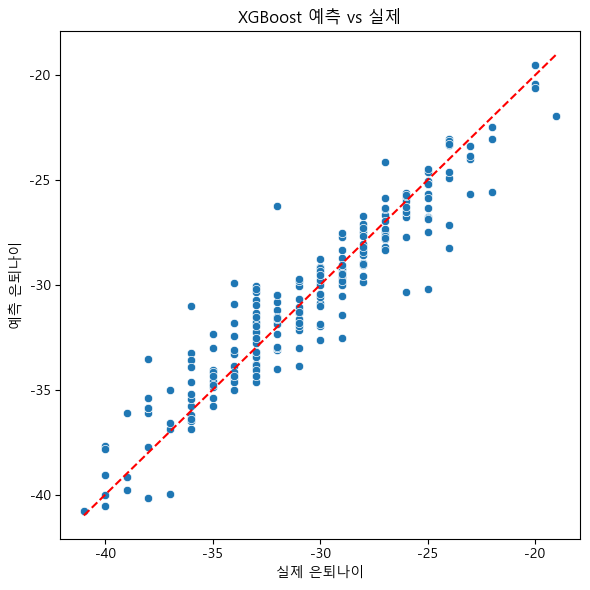


🔍 오차 큰 TOP 10
     실제 은퇴나이    예측 은퇴나이     오차(년)
189      -32 -26.247908 -5.752092
106      -25 -30.208817  5.208817
33       -36 -31.015392 -4.984608
190      -38 -33.536259 -4.463741
213      -26 -30.319378  4.319378
76       -24 -28.253250  4.253250
183      -34 -29.895361 -4.104639
2        -22 -25.587194  3.587194
18       -29 -32.517555  3.517555
123      -24 -27.144104  3.144104


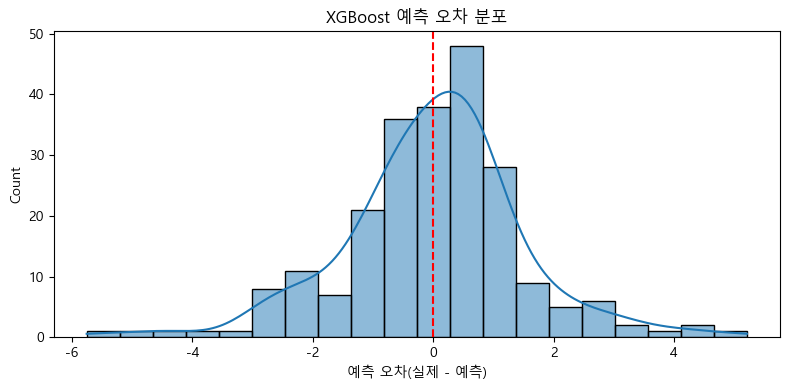

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import pickle
from xgboost import XGBRegressor

# 1. 데이터 로드
df = pd.read_csv(r"C:\Users\In\Desktop\프로젝트\SKN13-2nd-2Team\data\mingyu\kbo_retired_total.csv")

# 2. 결측치 제거
df = df.dropna()

# 3. 파생 변수 생성 (존재하는 컬럼에 한해서 안전하게 처리)
if 'birth_year' in df.columns and 'retire_year' in df.columns:
    df['은퇴_나이'] = df['birth_year'] - df['retire_year']

if 'birth_year' in df.columns and '입단년도' in df.columns:
    df['입단_나이'] = df['birth_year'] - df['입단년도']

if 'retire_year' in df.columns and '입단년도' in df.columns:
    df['경력'] = df['retire_year'] - df['입단년도']

if 'total_games' in df.columns and '경력' in df.columns:
    df['avg_games_per_year'] = df['total_games'] / df['경력'].replace(0, 1)

# 4. 문자열(불필요) 컬럼 제거
df = df.drop(columns=['선수명'], errors='ignore')

# 5. 더미 인코딩
df = pd.get_dummies(df)

# 6. X, y 분리
target_col = '은퇴_나이'
if target_col not in df.columns:
    raise ValueError(f"타깃 컬럼 '{target_col}'이(가) 데이터에 없습니다.")

X = df.drop(columns=[target_col])
y = df[target_col]

# 7. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8. XGBoost 모델 학습
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 9. 피클로 저장
with open('kbo_xgb_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("모델이 'kbo_xgb_model.pkl'로 저장되었습니다.")

# 10. 성능 평가
print("\n[XGBoost 모델 평가]")
print("MAE :", round(mean_absolute_error(y_test, y_pred), 2))
print("MSE :", round(mean_squared_error(y_test, y_pred), 2))
print("R²  :", round(r2_score(y_test, y_pred), 4))

# 11. 예측 vs 실제 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('실제 은퇴나이')
plt.ylabel('예측 은퇴나이')
plt.title('XGBoost 예측 vs 실제')
plt.tight_layout()
plt.show()

# 12. 오차 큰 선수 확인
result_df = pd.DataFrame({
    '실제 은퇴나이': y_test.values,
    '예측 은퇴나이': y_pred,
    '오차(년)': y_test.values - y_pred
})
print("\n🔍 오차 큰 TOP 10")
print(result_df.sort_values(by='오차(년)', key=abs, ascending=False).head(10))

# 13. 오차 분포 시각화
plt.figure(figsize=(8, 4))
sns.histplot(result_df['오차(년)'], bins=20, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('XGBoost 예측 오차 분포')
plt.xlabel('예측 오차(실제 - 예측)')
plt.tight_layout()
plt.show()

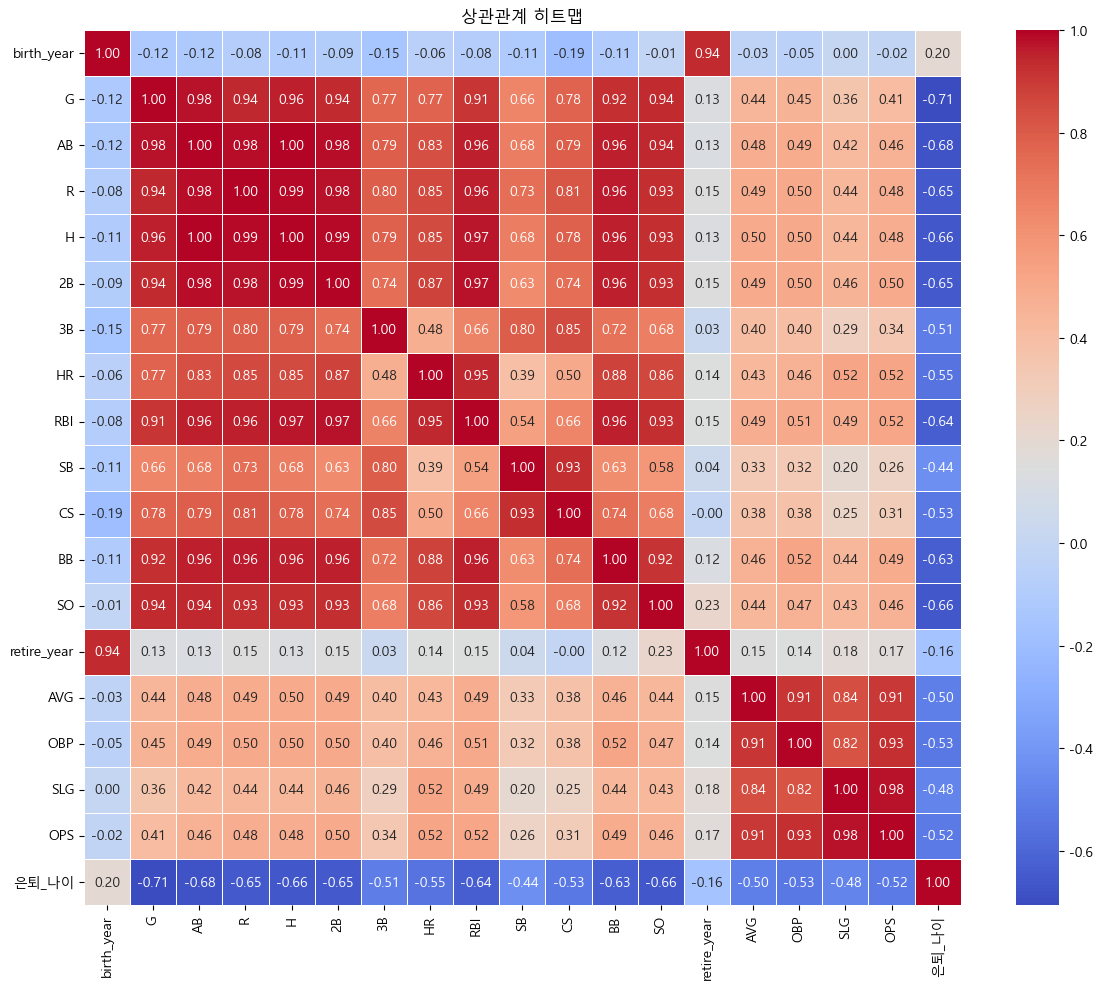

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 불러오기 및 전처리
df = pd.read_csv(r"C:\Users\In\Desktop\프로젝트\SKN13-2nd-2Team\data\mingyu\kbo_retired_total.csv")
df['은퇴_나이'] = df['birth_year'] - df['retire_year']
df = df.drop(columns=['선수명'], errors='ignore')
df = df.dropna()

# 2. 상관관계 계산
corr_matrix = df.corr(numeric_only=True)

# 3. 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("상관관계 히트맵")
plt.tight_layout()
plt.show()